# SVD,Linear Systems and Least Square

Linear System of equations
$X\theta=Y$

X and Y is known where $\theta$ to be found.

In most cases X is square matrix and invertible but SVD helps us to generalize solution for non square X

> Non-square matrices (m-by-n matrices for which m ≠ n) do not have an inverse. A square matrix that is not invertible is called `singular or degenerate`. A square matrix is singular if and only if its determinant is 0.

> In linear algebra an n-by-n (square) matrix A is called invertible (some authors use nonsingular or nondegenerate) 

There the term `psuedo inverse` comes in picture, where we use SVD to calculate the inverse of a non square matrix.

## Types of Non-Square Matrix solutions

m = number of samples(number of rows)\
n = number of features(number of columns)

### Underdetermined (m<n)

                       X                  𝜃     Y
         ______________________________   _     _
        |        SHORT                 | | | = | |
        |        FAT                   | | |   | |
        |______________________________| | |   |_|
                                         | |
                                         | |
                                         |_|

In general $\infty$ many solutions of $\theta$ given Y. as there are not enough samples available of Y to determine $\theta$. But again there are cases where solution is possible. We'll understand more about this later.

### Overdetermined (m>n)

               X          𝜃     Y            
         ______________   _     _
        |     TALL     | | | = | |
        |    SKINNY    | | |   | |
        |              | | |   | |
        |              | | |   | |
        |              | | |   | |
        |              | |_|   | |
        |              |       | |
        |              |       | |
        |______________|       |_|
        
        
In general 0 solution of $\theta$ given Y. But again we can cook up matrix that generates a solution.


> This is where SVD helps, It generates the best approximate psuedo inverse that gives us a result for $\theta$ for best fit.

## Minimum Norm Solution

for underdetermined cases

${{min || \tilde{\theta} ||_2}\atop{\text{minimum norm soln}}} {s.t. X \tilde{\theta} = Y}$

It is like cheapest way to multiply matrix X to $\theta$

`I am not sure If I understand this` 

## Least Squares Solution (Calculating $\tilde{\theta}$)

for overdetermined cases

$minimize || X \tilde{\theta} - Y ||_2$


$X = \hat{U} \hat{\Sigma} \hat{V}^T (\text{economy})$

\begin{align}
    & X \tilde{\theta} = Y \\
    & \hat{U} \hat{\Sigma} \hat{V}^T \tilde{\theta} = Y\\
    & \hat{V} \hat{\Sigma}^{-1} \hat{U}^T \hat{U} \hat{\Sigma} \hat{V}^T \tilde{\theta} = \hat{V} \hat{\Sigma}^{-1} \hat{U}^T Y\\
    & \tilde{\theta} = \hat{V} \hat{\Sigma}^{-1} \hat{U}^T Y
\end{align}

where
\begin{align}
\hat{U}^T \hat{U} = I\\
\hat{\Sigma}^{-1} \hat{\Sigma} = I\\
\hat{V} \hat{V}^T = I
\end{align}

## Moore-Penrose Inverse

$X^\dagger = V \Sigma^{-1} U^T$ 

It is called the [Moore–Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse).
        where $X^\dagger$(X-dagger) is psuedo inverse.

But what happens when we again multiply $\tilde{\theta}$ to X ?

\begin{align}
    X \tilde{\theta} \\
    \hat{U} \hat{\Sigma} \hat{V}^T \hat{V} \hat{\Sigma}^{-1} \hat{U}^T Y \\
    \hat{U} \hat{U}^T Y
\end{align}

because 
    \begin{align}
    \hat{V}^T \hat{V} = I \\ 
    \hat{\Sigma} \hat{\Sigma}^{-1} = I\\
    \text{but} && \hat{U} \hat{U}^T \ne I
\end{align}

because It is an economy SVD and in economy SVD U matrix is not a square matrix. For proof see SVD doc.

> This is the reason why the result is not exactly Y.

projection of Y onto span(U) [Columns of U] and that means span(X) [Columns of X]

## Understanding spaces

Solution of $X \theta = Y$ exists only and only if Y is in column space of X.


where

* Column space of A [col(A)] = Column space of $\hat{U}$ [col($\hat{U}$)]  ... range
* Kernel of $A^T$ [ker($A^T$)]  ... orthogonal compliment to col(A) (The orthogonal complement is a subspace of vectors where all of the vectors in it are orthogonal to all of the vectors in a particular subspace. For instance, if you are given a plane in ℝ³, then the orthogonal complement of that plane is the line that is normal to the plane and that passes through (0,0,0).)
* Row space of A [row(A)] = Row space of $V^T$ [row($V^T$)] = Column space of V [col(V)]
* Kernel of A [ker(A)] ... null space (In mathematics, the kernel of a linear map, also known as the null space or nullspace, is the linear subspace of the domain of the map which is mapped to the zero vector.)

TODO

## Calculate with Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

In [1]:
from sklearn.datasets import make_regression

### With 1 Feature

In [168]:
X,Y = make_regression(n_samples=50,n_features=1,noise=20)

In [169]:
Y = Y.reshape(-1,1)

In [170]:
X.shape, Y.shape

((50, 1), (50, 1))

In [171]:
U,S,VT = np.linalg.svd(X,full_matrices=False)

In [172]:
U.shape, S.shape, VT.shape

((50, 1), (1,), (1, 1))

In [173]:
theta_tilde = VT.T @ np.linalg.pinv(np.diag(S)) @ U.T @ Y

In [174]:
Y_pred = X @ theta_tilde

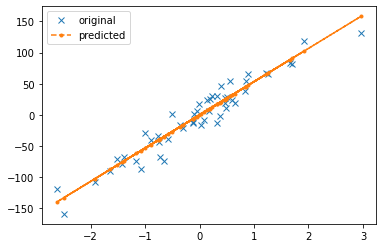

In [175]:
%matplotlib inline


plt.plot(X[...,0],Y,'x',label='original')
plt.plot(X[...,0],Y_pred,'.--',label='predicted')

plt.legend()
plt.show()

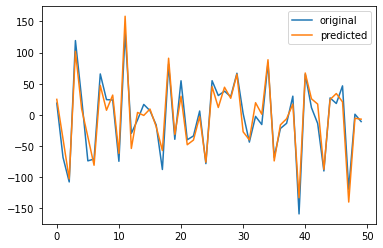

In [176]:
plt.plot(Y,label='original')
plt.plot(Y_pred,label='predicted')

plt.legend()
plt.show()

### With 2 features

In [177]:
X,Y = make_regression(n_samples=500,n_features=2,noise=50)

In [178]:
Y = Y.reshape(-1,1)

In [179]:
X.shape, Y.shape

((500, 2), (500, 1))

In [180]:
U,S,VT = np.linalg.svd(X,full_matrices=False)

In [181]:
U.shape, S.shape, VT.shape

((500, 2), (2,), (2, 2))

In [182]:
theta_tilde = VT.T @ np.linalg.pinv(np.diag(S)) @ U.T @ Y

In [183]:
Y_pred = X @ theta_tilde

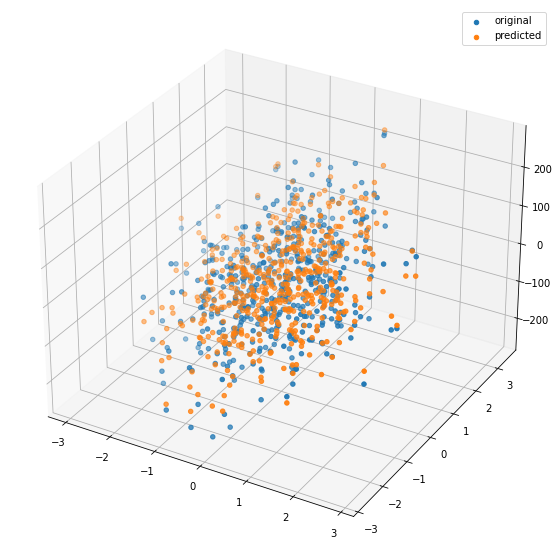

In [184]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(X[...,0],X[...,1],Y, cmap='viridis',label='original')
ax.scatter(X[...,0],X[...,1],Y_pred, cmap='viridis',label='predicted')

plt.legend()
plt.show()

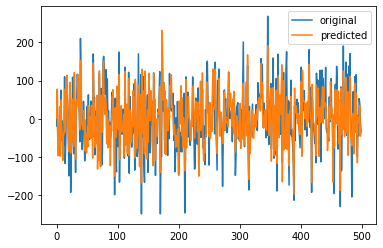

In [185]:
plt.plot(Y,label='original')
plt.plot(Y_pred,label='predicted')

plt.legend()
plt.show()

## Another method to calcualte $\tilde{\theta}$

$X \theta = Y$

$\tilde{\theta} = pinv(X) Y$

In [187]:
theta_tilde2 = np.linalg.pinv(X) @ Y

In [188]:
Y_pred = X @ theta_tilde2

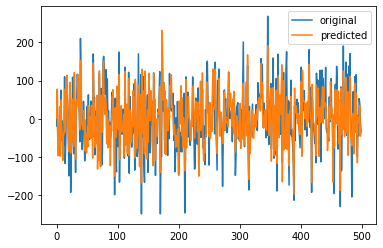

In [189]:
plt.plot(Y,label='original')
plt.plot(Y_pred,label='predicted')

plt.legend()
plt.show()

## Boston housing data regression analysis

In [190]:
from sklearn.datasets import load_boston

In [191]:
dataset = load_boston()

In [194]:
X,Y = dataset.data,dataset.target.reshape(-1,1)

In [196]:
X.shape, Y.shape

((506, 13), (506, 1))

In [197]:
U, S, VT = np.linalg.svd(X,full_matrices=False)

In [199]:
theta_tilde = VT.T @ np.linalg.pinv(np.diag(S)) @ U.T @ Y

In [200]:
Y_pred = X @ theta_tilde

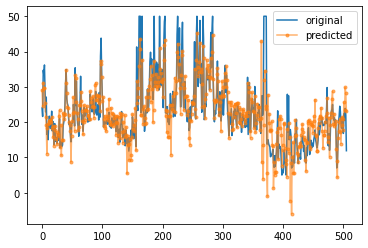

In [204]:
plt.plot(Y,label='original')
plt.plot(Y_pred,'.-',label='predicted',alpha=0.6)

plt.legend()
plt.show()